<a href="https://colab.research.google.com/github/CamillaSemenzzatt/Mack/blob/main/Anomalias_aprendizado_Ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving annthyroid_21feat_normalised.csv to annthyroid_21feat_normalised (1).csv
Avaliação do K-Means:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      6666
           1       0.02      0.07      0.03       534

    accuracy                           0.67      7200
   macro avg       0.46      0.39      0.42      7200
weighted avg       0.84      0.67      0.74      7200


Avaliação do DBSCAN:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6666
           1       0.15      0.19      0.17       534

    accuracy                           0.86      7200
   macro avg       0.54      0.55      0.55      7200
weighted avg       0.88      0.86      0.87      7200


Avaliação do Isolation Forest:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6666
           1       0.11      0.15      0.12       534

    accuracy              

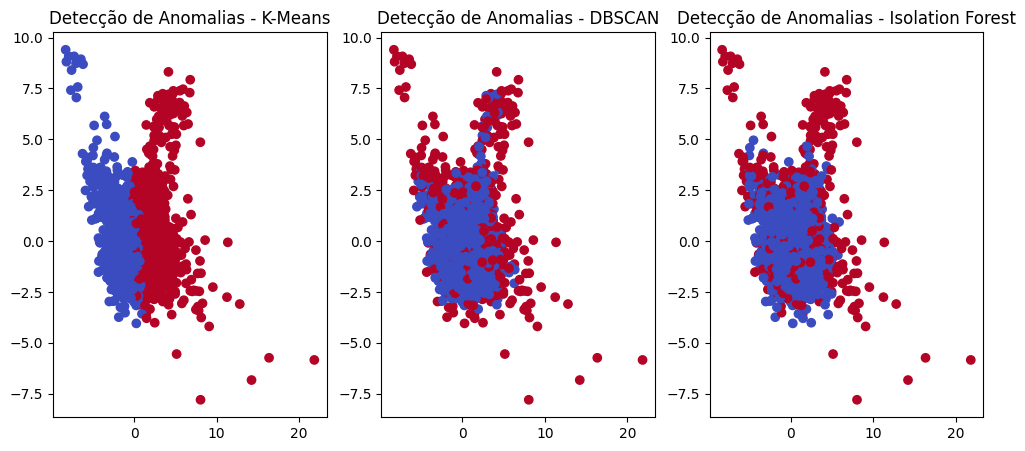

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report


from google.colab import files
uploaded = files.upload()

df = pd.read_csv("annthyroid_21feat_normalised.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicação dos algoritmos

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Label'] = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Label'] = dbscan.fit_predict(X_scaled)
df['DBSCAN_Label'] = np.where(df['DBSCAN_Label'] == -1, 1, 0)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['IsoForest_Label'] = iso_forest.fit_predict(X_scaled)
df['IsoForest_Label'] = np.where(df['IsoForest_Label'] == -1, 1, 0)

# Avaliação dos modelos
print("Avaliação do K-Means:")
print(classification_report(y, df['KMeans_Label']))
print("\nAvaliação do DBSCAN:")
print(classification_report(y, df['DBSCAN_Label']))
print("\nAvaliação do Isolation Forest:")
print(classification_report(y, df['IsoForest_Label']))

# Visualização dos dados usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Label'], cmap='coolwarm')
plt.title("Detecção de Anomalias - K-Means")

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DBSCAN_Label'], cmap='coolwarm')
plt.title("Detecção de Anomalias - DBSCAN")

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['IsoForest_Label'], cmap='coolwarm')
plt.title("Detecção de Anomalias - Isolation Forest")

plt.show()